C:\Users\harsh kankariya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2808 - loss: 2.0294
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3576 - loss: 1.8408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


'Truck'

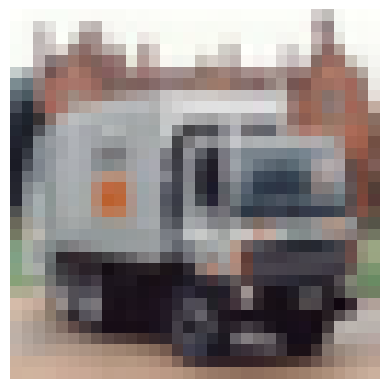

In [19]:
# !pip install scikit-learn tensorflow matplotlib
# !pip install scikit-learn

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
cifar_10_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Visualize an example image from the dataset
# plt.imshow(x_train[10])
# plt.title(cifar_10_classes[y_train[0][0]])
# plt.axis("off")
# plt.show()

X_train = x_train / 255.0
X_test = x_test / 255.0

one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()


softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])

softmax_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

softmax_model.fit(X_train, y_train, epochs=2, batch_size=64)#, validation_data=(X_test, y_test))

new_image = x_test[11]
plt.imshow(new_image)
plt.axis("off")

new_image = np.expand_dims(new_image,axis=0)
# new_image.shape

pred = softmax_model.predict(new_image)
prediction = np.argmax(pred)
cifar_10_classes[prediction]
